<a href="https://colab.research.google.com/github/MajorFeijo/RNA-e-Deep-Learning-CESAR-School-2023.02/blob/main/Atividade%20aula%203.4/3_4_LogisticRegressionMNIST_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [2]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [3]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 40323857.10it/s]


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1133687.98it/s]


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9631275.39it/s]


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7221580.28it/s]

Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [13]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [5]:
model = torch.nn.Linear(28*28, 10)

In [7]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[-0.4189, -0.5931,  0.4861,  0.9397, -0.2304, -0.2528,  0.3225, -0.7546,
         -0.7063, -0.2024]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [8]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [9]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

In [10]:
print('Final loss:', loss.data)

Final loss: tensor(0.1545)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

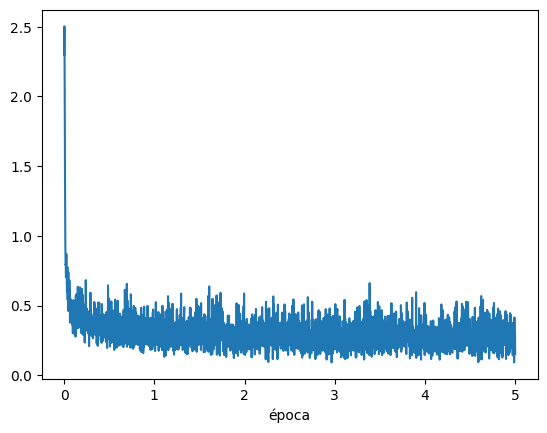

In [11]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

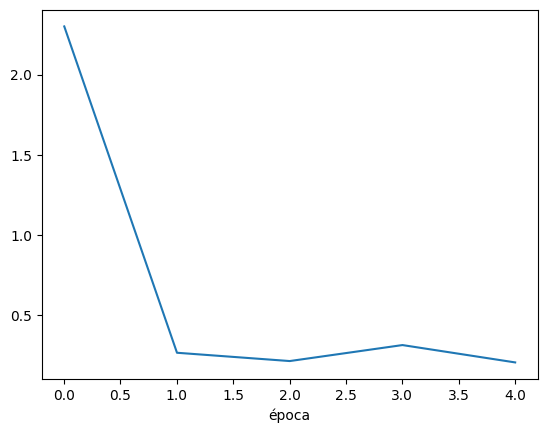

In [12]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

1. Qual é o tamanho do mini-batch?
      Resposta 100
2. Em uma época, quantos mini-batches existem?
      Resposta Número de minibatches de treinamento: 600
3. Qual é a definição de época?
      Resposta: Um looping que varre todos os minibatch disponíveis


## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo:
    - Época: 1/4, batch: 600

In [26]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

        # Imprimir o progresso após cada minibatch
    print(f"Época: {i+1}/{n_epochs}, batch: {n_batches_train}")

Época: 1/5, batch: 60
Época: 2/5, batch: 60
Época: 3/5, batch: 60
Época: 4/5, batch: 60
Época: 5/5, batch: 60


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.


Treinando com batch_size = 60

Treinando com batch_size = 600

Treinando com batch_size = 6000


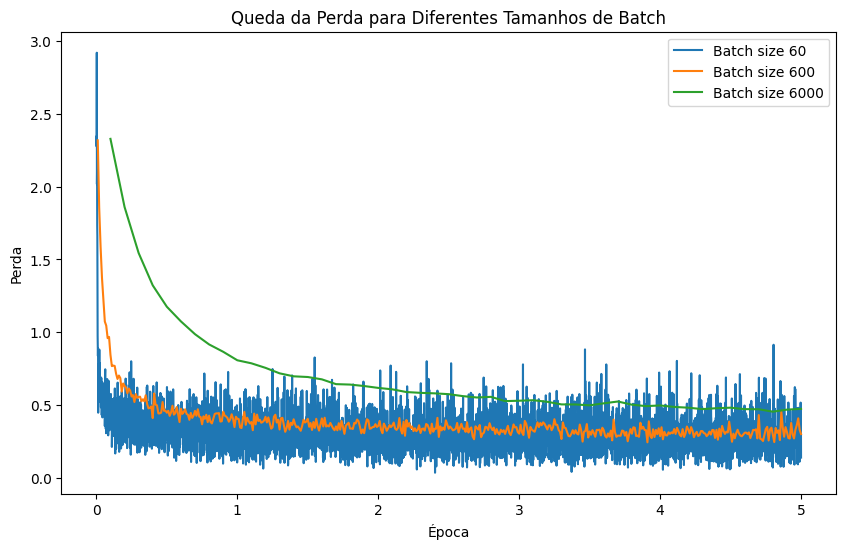

In [27]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt

# Definir função de treinamento para reutilização
def train_model(batch_size, n_epochs=5, learning_rate=0.5):
    dataset_dir = 'MNIST/'
    dataset_train = torchvision.datasets.MNIST(dataset_dir, train=True, download=True,
                                               transform=torchvision.transforms.ToTensor())

    loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)
    n_batches_train = len(loader_train)
    total_samples = len(dataset_train)

    model = torch.nn.Linear(28*28, 10)

    # Utilizaremos CrossEntropyLoss como função de perda
    criterion = torch.nn.CrossEntropyLoss()

    # Gradiente descendente
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    epochs = []
    losses = []

    total_trained_samples = 0
    for i in range(n_epochs):
        for k, (x_train, y_train) in enumerate(loader_train):
            # Transforma a entrada para uma dimensão
            inputs = Variable(x_train.view(-1, 28 * 28))
            # predict da rede
            outputs = model(inputs)

            # calcula a perda
            loss = criterion(outputs, Variable(y_train))

            # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_trained_samples += x_train.size(0)
            epochs.append(total_trained_samples / total_samples)
            losses.append(loss.data.item())

            # Imprimir o progresso após cada minibatch
            # print(f"Época: {i+1}/{n_epochs}, batch: {k+1}/{n_batches_train}, loss: {loss.data.item()}")

    return epochs, losses

# Treinar e coletar dados para cada tamanho de batch
batch_sizes = [60, 600, 6000]
results = {}

for batch_size in batch_sizes:
    print(f"\nTreinando com batch_size = {batch_size}")
    epochs, losses = train_model(batch_size)
    results[batch_size] = (epochs, losses)

# Plotar as perdas para diferentes tamanhos de batch
plt.figure(figsize=(10, 6))

for batch_size, (epochs, losses) in results.items():
    plt.plot(epochs, losses, label=f'Batch size {batch_size}')

plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.title('Queda da Perda para Diferentes Tamanhos de Batch')
plt.show()

## Conclusões sobre os experimentos deste notebook

A escolha do tamanho de batch é um compromisso entre estabilidade e velocidade de convergência. Tamanhos de batch menores oferecem mais variabilidade nas atualizações do gradiente, o que pode ser benéfico para escapar de mínimos locais, mas resultam em um treinamento mais ruidoso. Tamanhos de batch maiores proporcionam atualizações de gradiente mais estáveis e uma convergência mais suave, mas podem ser menos eficientes em termos de iterações por época e exigem mais recursos de memória.
